## PREGUNTA DE NEGOCIO SEMANA 4

- Necesitmos ajustar nuestra estrategia de negocio para alinearnos con las tendencias nacionales y maximizar las oportunidades de mercado.
- Es necesario ajustar nuestras ofertas al perfil del viajero y a la demanda de pernoctaciones a las ciudades donde estamos presentes, considerando las cifras oficiales sobre procedencia, meses de visita y mediana de pernoctaciones por comunidad autónoma?


### MESES DE VISITA POR PROVINCIA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import warnings
import squarify
import matplotlib.cm as cm
import matplotlib.colors as colors
warnings.filterwarnings("ignore")

In [21]:
df = pd.read_csv(r"C:\Users\Usuario\Desktop\E19\ProjecteData\Equip_19\Data\datos_INE_consolidados_17112025.csv")
df.head()

,año,mes,provincia,pais_residencia,pernoctaciones,total_viajeros,media_pernoctaciones,fecha
0,2015,Enero,Islas Baleares,Total,25933.0,3705.0,7.00,2015-01-01
1,2015,Febrero,Islas Baleares,Total,30280.0,4382.0,6.91,2015-02-01
2,2015,Marzo,Islas Baleares,Total,46156.0,6536.0,7.06,2015-03-01
3,2015,Abril,Islas Baleares,Total,226542.0,36181.0,6.26,2015-04-01
4,2015,Mayo,Islas Baleares,Total,888610.0,145473.0,6.11,2015-05-01


In [22]:
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')

df['mes_num'] = df['fecha'].dt.month

In [23]:
df.dtypes

año                              int64
mes                             object
provincia                       object
pais_residencia                 object
pernoctaciones                 float64
total_viajeros                 float64
media_pernoctaciones           float64
fecha                   datetime64[ns]
mes_num                          int32
dtype: object

In [24]:
df

,año,mes,provincia,pais_residencia,pernoctaciones,total_viajeros,media_pernoctaciones,fecha,mes_num
0,2015,Enero,Islas Baleares,Total,25933.0,3705.0,7.00,2015-01-01,1
1,2015,Febrero,Islas Baleares,Total,30280.0,4382.0,6.91,2015-02-01,2
2,2015,Marzo,Islas Baleares,Total,46156.0,6536.0,7.06,2015-03-01,3
3,2015,Abril,Islas Baleares,Total,226542.0,36181.0,6.26,2015-04-01,4
4,2015,Mayo,Islas Baleares,Total,888610.0,145473.0,6.11,2015-05-01,5
...,...,...,...,...,...,...,...,...,...
17047,2021,Agosto,Valencia,Resto del mundo,1408.0,361.0,3.90,2021-08-01,8
17048,2021,Septiembre,Valencia,Resto del mundo,1257.0,317.0,3.97,2021-09-01,9
17049,2021,Octubre,Valencia,Resto del mundo,1087.0,324.0,3.35,2021-10-01,10
17050,2021,Noviembre,Valencia,Resto del mundo,1279.0,361.0,3.54,2021-11-01,11


In [25]:
import matplotlib.pyplot as plt

def format_millions(x, pos):
    """
    Formatea los números como:
    1.2M, 850k, 32k, 500
    """
    if x >= 1_000_000:
        return f"{x/1_000_000:.1f}M"
    elif x >= 1_000:
        return f"{x/1_000:.0f}k"
    else:
        return str(int(x))


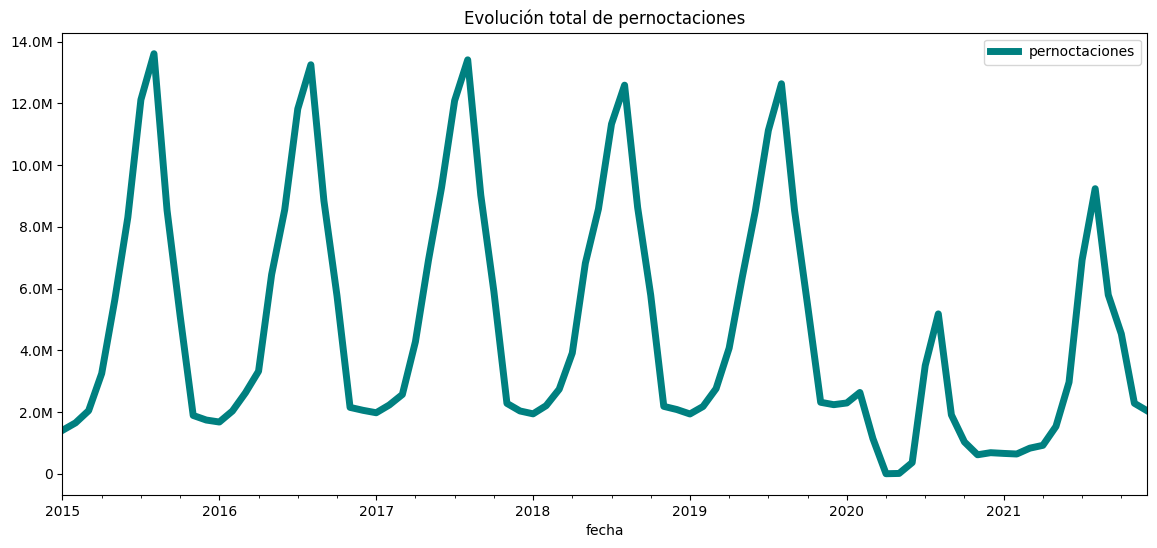

In [26]:
df['pernoctaciones'] = df['pernoctaciones'].astype('Int64')


# Agrupar por fecha
pernoctaciones_por_año = df.groupby('fecha').agg({
    'total_viajeros': 'sum',
    'pernoctaciones': 'sum',
    'media_pernoctaciones': 'mean'
}).reset_index()


# Asegura enteros
pernoctaciones_por_año['pernoctaciones'] = pernoctaciones_por_año['pernoctaciones'].round().astype(int)

ax = pernoctaciones_por_año.plot(
    x='fecha', 
    y='pernoctaciones', 
    kind='line', 
    figsize=(14,6), 
    title='Evolución total de pernoctaciones',
    color='teal',
    linewidth=5
)

ax.yaxis.set_major_formatter(FuncFormatter(format_millions))
plt.show()

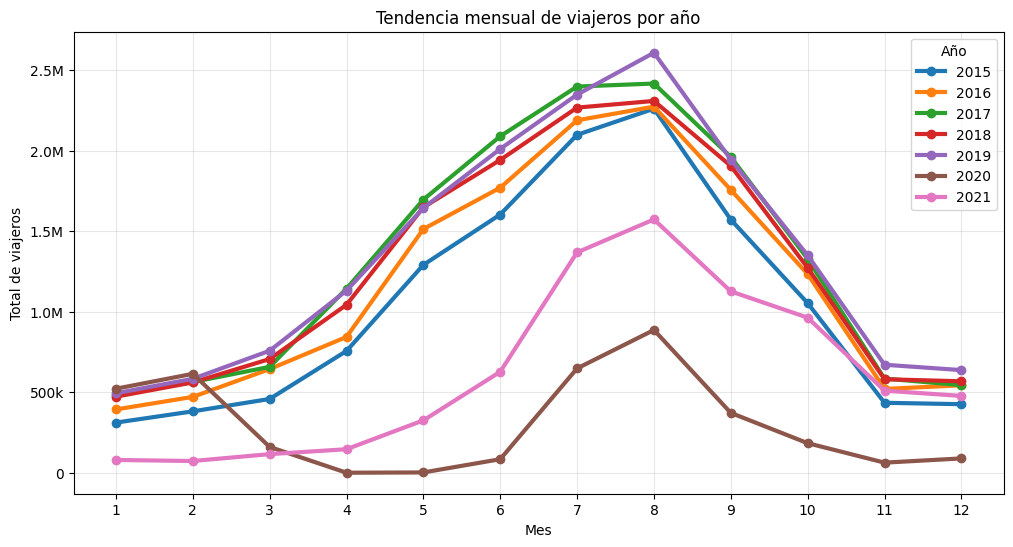

In [28]:
df_plot = df.groupby(['año', 'mes_num'])['total_viajeros'].sum().reset_index()

plt.figure(figsize=(12, 6))

for year in sorted(df_plot['año'].unique()):
    df_year = df_plot[df_plot['año'] == year]
    plt.plot(df_year['mes_num'], df_year['total_viajeros'],
             marker='o', linewidth=3, label=str(year))

plt.title('Tendencia mensual de viajeros por año')
plt.xlabel('Mes')
plt.ylabel('Total de viajeros')
plt.xticks(range(1, 13))
plt.grid(alpha=0.3)
plt.legend(title='Año')


plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions))

plt.show()


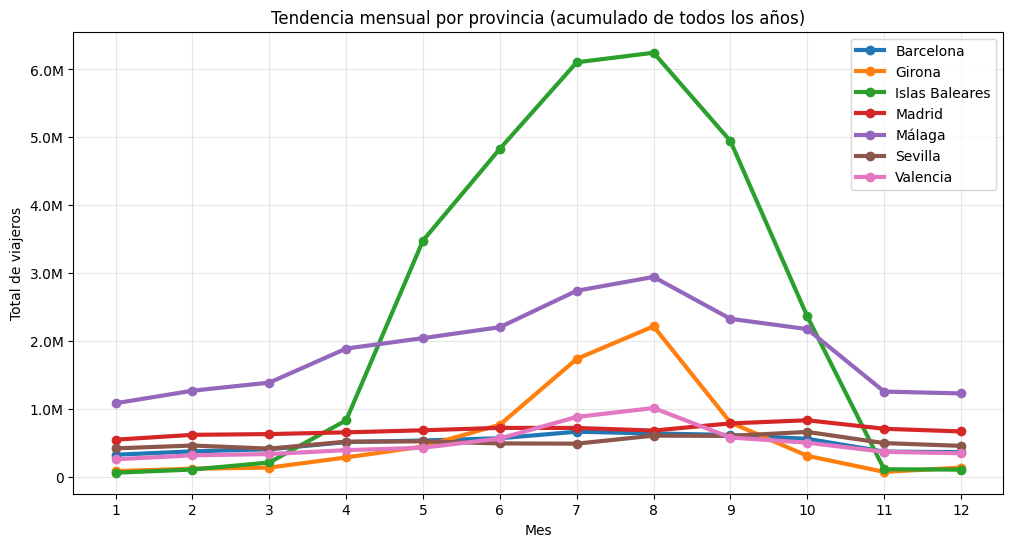

In [ ]:
plt.figure(figsize=(12,6))

# Agrupación correcta (fuera del bucle para eficiencia)
df_p = df.groupby(['provincia','mes_num'])['total_viajeros'].sum().reset_index()

for prov in sorted(df['provincia'].unique()):
    df_sub = df_p[df_p['provincia'] == prov]
    plt.plot(df_sub['mes_num'], df_sub['total_viajeros'],
             marker='o', linewidth=3, label=prov)

plt.title("Tendencia mensual por provincia (acumulado de todos los años)")
plt.xlabel("Mes")
plt.ylabel("Total de viajeros")
plt.xticks(range(1,13))
plt.grid(alpha=0.3)
plt.legend()

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions))

plt.show()


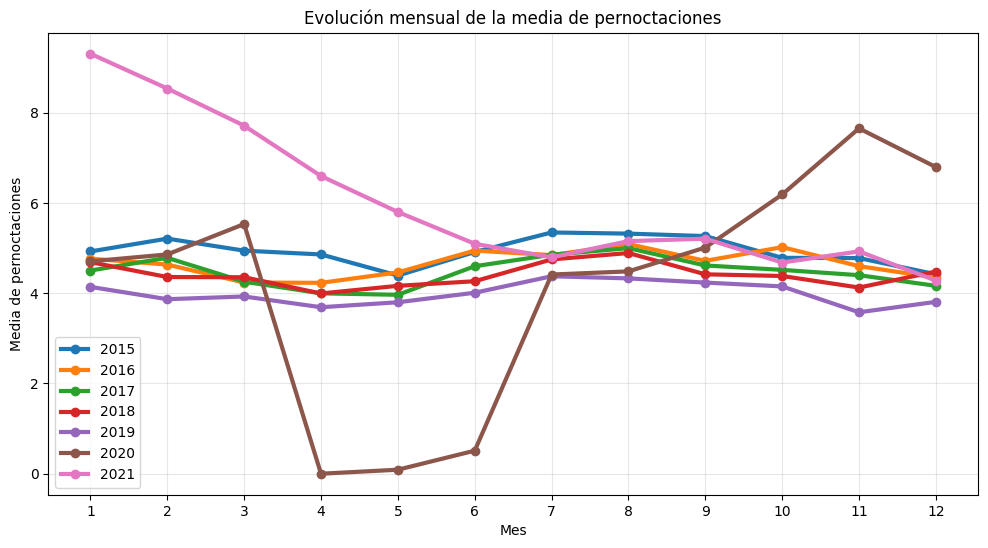

In [30]:
df_media = df.groupby(['año','mes_num'])['media_pernoctaciones'].mean().reset_index()

plt.figure(figsize=(12,6))

for year in df_media['año'].unique():
    df_y = df_media[df_media['año'] == year]
    plt.plot(df_y['mes_num'], df_y['media_pernoctaciones'], marker='o', label=str(year), linewidth=3)

plt.title("Evolución mensual de la media de pernoctaciones")
plt.xlabel("Mes")
plt.ylabel("Media de pernoctaciones")
plt.xticks(range(1,13))
plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [31]:
# Asegurarnos de que 'fecha' es datetime
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')
df = df.dropna(subset=['fecha'])

# Crear columna 'periodo' pre/post COVID
df['periodo'] = df['fecha'].apply(lambda x: 'pre-COVID' if x < pd.Timestamp('2020-03-01') else 'post-COVID')

# Comprobamos
print(df[['fecha','periodo']].head(10))
print(df['periodo'].value_counts())

       fecha    periodo
0 2015-01-01  pre-COVID
1 2015-02-01  pre-COVID
2 2015-03-01  pre-COVID
3 2015-04-01  pre-COVID
4 2015-05-01  pre-COVID
5 2015-06-01  pre-COVID
6 2015-07-01  pre-COVID
7 2015-08-01  pre-COVID
8 2015-09-01  pre-COVID
9 2015-10-01  pre-COVID
periodo
pre-COVID     12586
post-COVID     4466
Name: count, dtype: int64


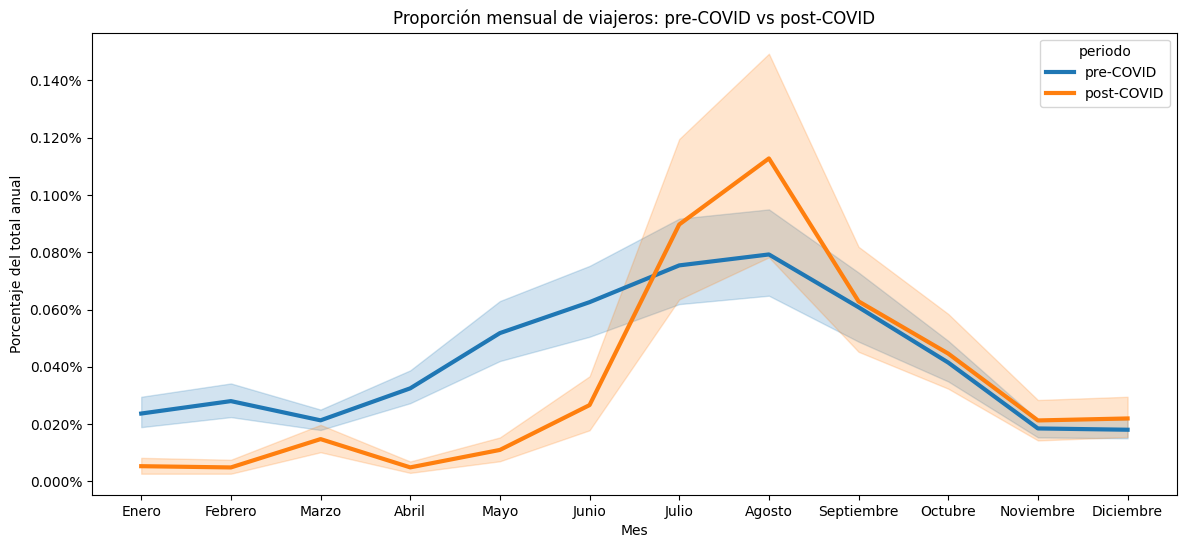

In [32]:
df['total_anual'] = df.groupby('año')['total_viajeros'].transform('sum')
df['rel_mes'] = df['total_viajeros'] / df['total_anual']

plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='mes', y='rel_mes', hue='periodo', linewidth=3)

plt.title('Proporción mensual de viajeros: pre-COVID vs post-COVID')
plt.xlabel('Mes')
plt.ylabel('Porcentaje del total anual')

# 👉 eje Y en %
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))

plt.show()



Esto muestra cómo cambió la concentración de viajeros por mes debido a la pandemia. 

- Línea = media histórica. Halo = variabilidad entre años.

- Si el halo es estrecho: La estacionalidad es estable, el mes siempre pesa más o menos igual. 

- Si el halo es ancho: La estacionalidad de ese mes no es estable entre años. Algunos años ese mes tuvo mucho peso anual, otros menos.

- Variabilidad post-COVID mucho más ancha → estacionalidad rota / cambiada.